# Exploratory Data Analysis of the Ultrasound Datasets

In [52]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from torchvision.datasets import ImageFolder

BUSI_DIR = "../data/busi"
BUS_BRA_DIR = "../data/BUSBRA"

## BUSI Dataset

In [88]:
dataset = ImageFolder(BUSI_DIR)

### Plot Class Distribution

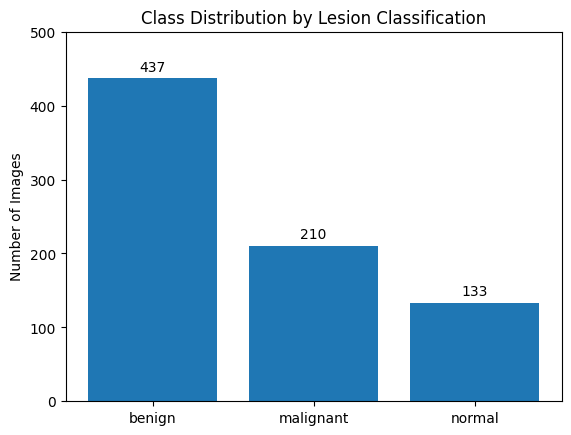

In [81]:
# Plot the distribution of lesion classifications
unique_values, value_counts = np.unique(dataset.targets, return_counts=True)

plt.bar(dataset.classes, value_counts)

ax = plt.gca()
for p in ax.patches:
    plt.text(
        p.get_x() + p.get_width() / 2,
        p.get_height() + 10,
        str(p.get_height()),
        ha="center",
    )

plt.xticks(rotation=0)
plt.ylabel("Number of Images")
plt.title("Class Distribution by Lesion Classification")
plt.ylim(0, 500)
plt.show()

### Plot Images in each Class

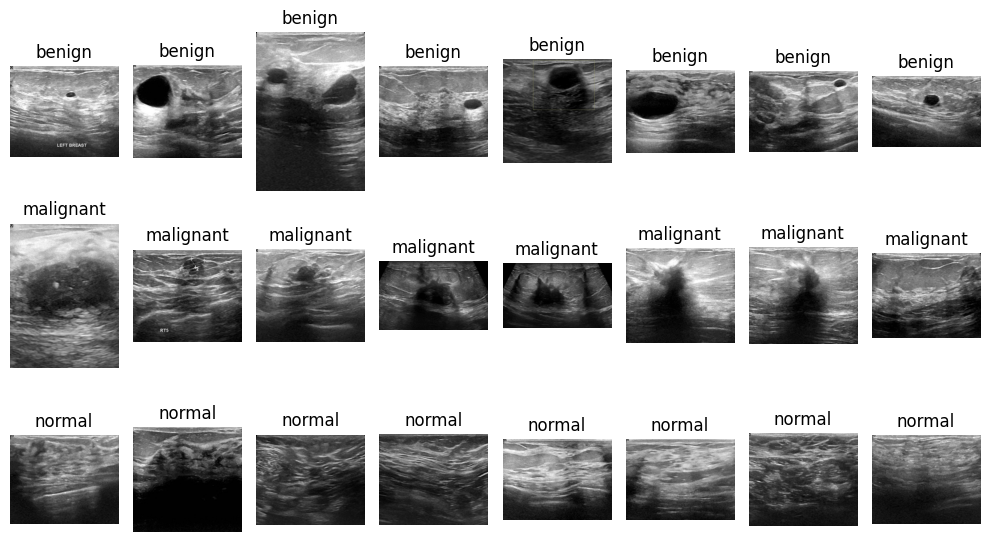

In [87]:
# Plot examples of images from each classification class
classes = dataset.classes
fig, axes = plt.subplots(len(classes), 8, figsize=(10, 6))


for i, cls in enumerate(classes):
    j = 0
    for path, target in dataset.samples:
        if target == i:
            img = Image.open(path)
            axes[i, j].imshow(img)
            axes[i, j].axis("off")
            axes[i, j].set_title(cls)
            j += 1
        if j == 8:
            break

plt.tight_layout()
plt.show()

### Get Image Statistics

In [92]:
image_widths = []
image_heights = []
for img, _ in dataset:
    image_widths.append(img.size[0])
    image_heights.append(img.size[1])

print("Image Statistics:")
print()
print(
    f"Width\t Min: {min(image_widths)}, Max: {max(image_widths)}, Mean: {sum(image_widths) / len(image_widths)}"
)
print(
    f"Height\t Min: {min(image_heights)}, Max: {max(image_heights)}, Mean: {sum(image_heights) / len(image_heights)}"
)

Image Statistics:

Width	 Min: 190, Max: 1048, Mean: 615.6794871794872
Height	 Min: 310, Max: 719, Mean: 501.4525641025641


## BUS-BRA Dataset

In [40]:
# Clinical data
CLINICAL_DATA_FILENAME = "bus_data.csv"

busbra_dataset = pd.read_csv(os.path.join(BUS_BRA_DIR, CLINICAL_DATA_FILENAME))
busbra_dataset["Patient"] = busbra_dataset["ID"].str.split("-").str[0]
busbra_dataset["Pathology"] = busbra_dataset["Pathology"].astype("category")
busbra_dataset["BIRADS"] = busbra_dataset["BIRADS"].astype("category")

busbra_dataset.head()

,ID,Case,Histology,Pathology,BIRADS,Device,Width,Height,Side,BBOX,Patient
0,bus_0001-l,1,invasive ductal carcinoma,malignant,4,GE Logiq 7 @10-14MHz,274,353,left,"[91,24,103,79]",bus_0001
1,bus_0001-r,1,invasive ductal carcinoma,malignant,4,GE Logiq 7 @10-14MHz,275,353,right,"[102,24,82,79]",bus_0001
2,bus_0002-l,2,fibroadenoma,benign,4,GE Logiq 7 @10-14MHz,274,371,left,"[134,142,88,50]",bus_0002
3,bus_0002-r,2,fibroadenoma,benign,4,GE Logiq 7 @10-14MHz,276,371,right,"[113,143,68,47]",bus_0002
4,bus_0003-l,3,invasive ductal carcinoma,malignant,4,GE Logiq 7 @10-14MHz,275,372,left,"[71,78,126,137]",bus_0003


### Plot Class Distributions

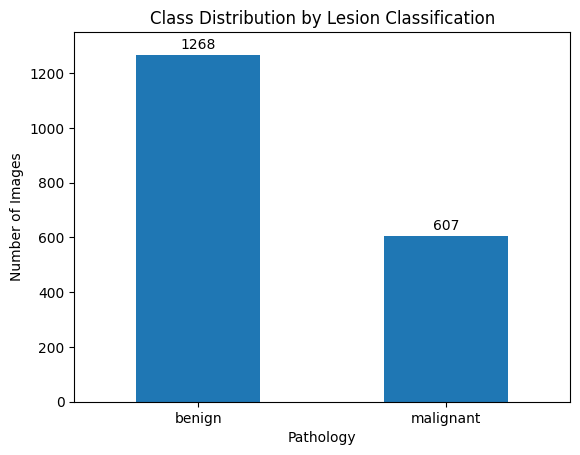

In [10]:
# Plot the distribution of lesion classifications
value_counts = busbra_dataset["Pathology"].value_counts().sort_index()
value_counts.plot(kind="bar")

ax = plt.gca()
for p in ax.patches:
    plt.text(p.get_x() + 0.25, p.get_height() + 20, str(p.get_height()), ha="center")

plt.xticks(rotation=0)
plt.ylabel("Number of Images")
plt.title("Class Distribution by Lesion Classification")
plt.ylim(0, 1350)
plt.show()

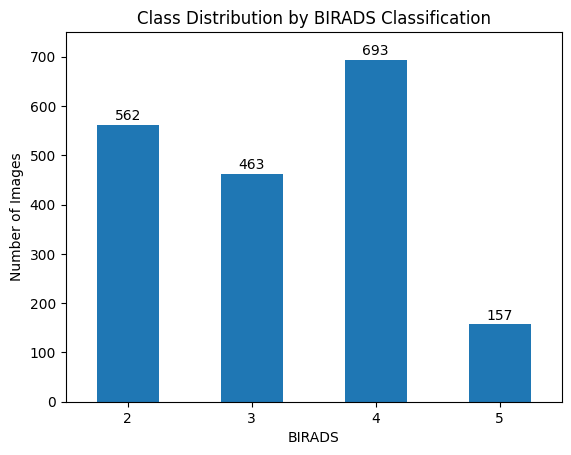

In [11]:
# Plot the distribution of BIRADS classifications
value_counts = busbra_dataset["BIRADS"].value_counts().sort_index()
value_counts.plot(kind="bar")

ax = plt.gca()
for p in ax.patches:
    plt.text(p.get_x() + 0.25, p.get_height() + 10, str(p.get_height()), ha="center")

plt.xticks(rotation=0)
plt.ylabel("Number of Images")
plt.title("Class Distribution by BIRADS Classification")
plt.ylim(0, 750)
plt.show()

### Plot Images in each Class

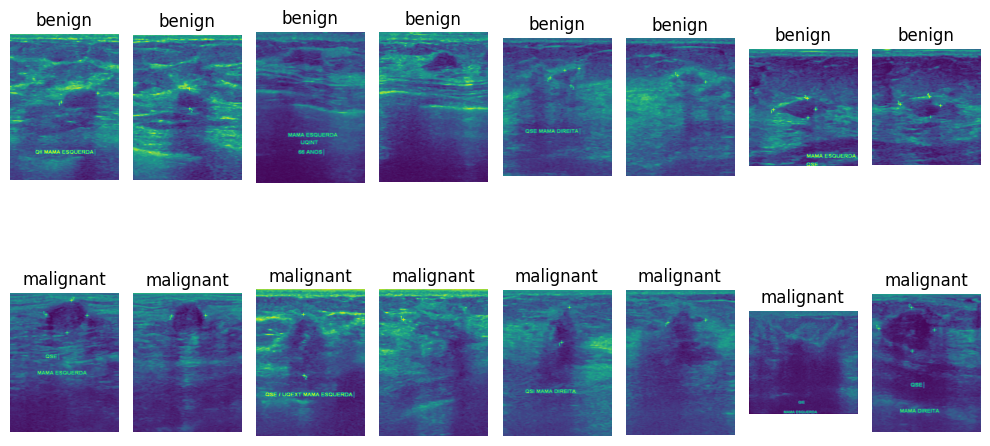

In [12]:
# Plot examples of images from each classification class
classes = busbra_dataset["Pathology"].cat.categories
fig, axes = plt.subplots(len(classes), 8, figsize=(10, 6))

for i, cls in enumerate(classes):
    cls_data = busbra_dataset[busbra_dataset["Pathology"] == cls]
    for j in range(8):
        try:
            img_path = os.path.join(
                BUS_BRA_DIR, "Images", cls_data.iloc[j]["ID"] + ".png"
            )
            img = plt.imread(img_path)
            axes[i, j].imshow(img)
            axes[i, j].axis("off")
            axes[i, j].set_title(cls)
        except IndexError:
            axes[i, j].axis("off")

plt.tight_layout()
plt.show()

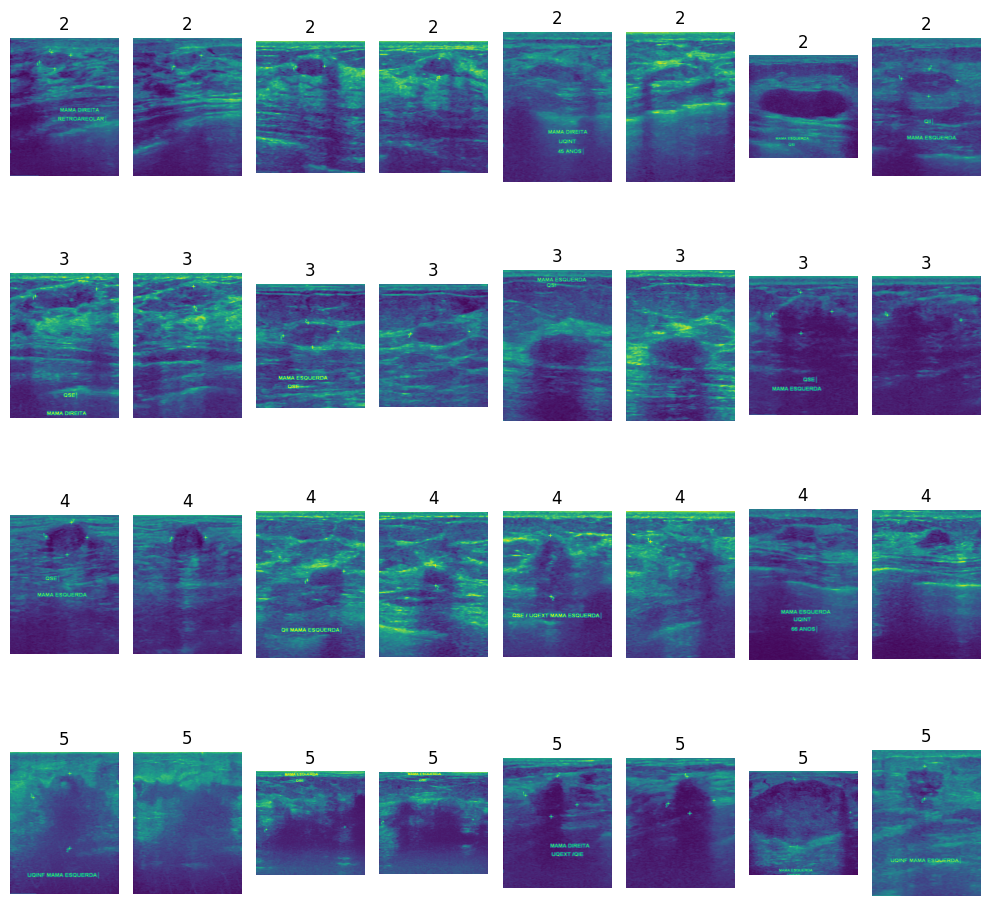

In [13]:
# Plot examples of images from each BIRADS class
classes = busbra_dataset["BIRADS"].cat.categories
fig, axes = plt.subplots(len(classes), 8, figsize=(10, 10))

for i, cls in enumerate(classes):
    cls_data = busbra_dataset[busbra_dataset["BIRADS"] == cls]
    for j in range(8):
        try:
            img_path = os.path.join(
                BUS_BRA_DIR, "Images", cls_data.iloc[j]["ID"] + ".png"
            )
            img = plt.imread(img_path)
            axes[i, j].imshow(img)
            axes[i, j].axis("off")
            axes[i, j].set_title(cls)
        except IndexError:
            axes[i, j].axis("off")

plt.tight_layout()
plt.show()

### Get Image Statistics

In [14]:
image_widths = []
image_heights = []
for id in busbra_dataset["ID"]:
    img_path = os.path.join(BUS_BRA_DIR, "Images", f"{id}.png")
    img = Image.open(os.path.join(BUS_BRA_DIR, img_path))
    image_widths.append(img.size[0])
    image_heights.append(img.size[1])


print("Image Statistics:")
print()
print(
    f"Width\t Min: {min(image_widths)}, Max: {max(image_widths)}, Mean: {sum(image_widths) / len(image_widths)}"
)
print(
    f"Height\t Min: {min(image_heights)}, Max: {max(image_heights)}, Mean: {sum(image_heights) / len(image_heights)}"
)

Image Statistics:

Width	 Min: 240, Max: 579, Mean: 321.3104
Height	 Min: 268, Max: 478, Mean: 391.2512


### Stratified Sampling Conditioned on Patient

For our 5 x 2 cross validation, we will need to ensure that the same patient does not appear in both the training and validation sets. We will use stratified sampling to ensure that the class distributions are preserved in the training and validation sets.

#### Pathology

In [41]:
# Split the patients into stratified splits
patients = (
    busbra_dataset.drop_duplicates("Case")
    .groupby(["Pathology"], group_keys=False)
    .apply(lambda x: x.sample(frac=0.5, random_state=0))["Case"]
    .to_list()
)
indices = busbra_dataset[busbra_dataset["Case"].isin(patients)].index
busbra_dataset["Fold"] = 1
busbra_dataset.loc[indices, "Fold"] = 0
busbra_dataset.head(10)

/tmp/ipykernel_81434/2490122450.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  patients = busbra_dataset.drop_duplicates("Case").groupby(["Pathology"], group_keys=False).apply(lambda x: x.sample(frac=0.5, random_state=0))["Case"].to_list()
/tmp/ipykernel_81434/2490122450.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  patients = busbra_dataset.drop_duplicates("Case").groupby(["Pathology"], group_keys=False).apply(lambda x: x.sample(frac=0.5, random_state=0))["Case"].to_list()


,ID,Case,Histology,Pathology,BIRADS,Device,Width,Height,Side,BBOX,Patient,Fold
0,bus_0001-l,1,invasive ductal carcinoma,malignant,4,GE Logiq 7 @10-14MHz,274,353,left,"[91,24,103,79]",bus_0001,1
1,bus_0001-r,1,invasive ductal carcinoma,malignant,4,GE Logiq 7 @10-14MHz,275,353,right,"[102,24,82,79]",bus_0001,1
2,bus_0002-l,2,fibroadenoma,benign,4,GE Logiq 7 @10-14MHz,274,371,left,"[134,142,88,50]",bus_0002,0
3,bus_0002-r,2,fibroadenoma,benign,4,GE Logiq 7 @10-14MHz,276,371,right,"[113,143,68,47]",bus_0002,0
4,bus_0003-l,3,invasive ductal carcinoma,malignant,4,GE Logiq 7 @10-14MHz,275,372,left,"[71,78,126,137]",bus_0003,0
5,bus_0003-r,3,invasive ductal carcinoma,malignant,4,GE Logiq 7 @10-14MHz,274,372,right,"[80,66,179,156]",bus_0003,0
6,bus_0004-l,4,fibroadenoma,benign,4,GE Logiq 7 @10-14MHz,274,383,left,"[70,50,94,32]",bus_0004,0
7,bus_0004-r,4,fibroadenoma,benign,4,GE Logiq 7 @10-14MHz,277,383,right,"[112,53,87,47]",bus_0004,0
8,bus_0005-l,5,invasive ductal carcinoma,malignant,4,GE Logiq 7 @10-14MHz,275,371,left,"[118,50,82,141]",bus_0005,1
9,bus_0005-r,5,invasive ductal carcinoma,malignant,4,GE Logiq 7 @10-14MHz,276,371,right,"[108,45,138,153]",bus_0005,1


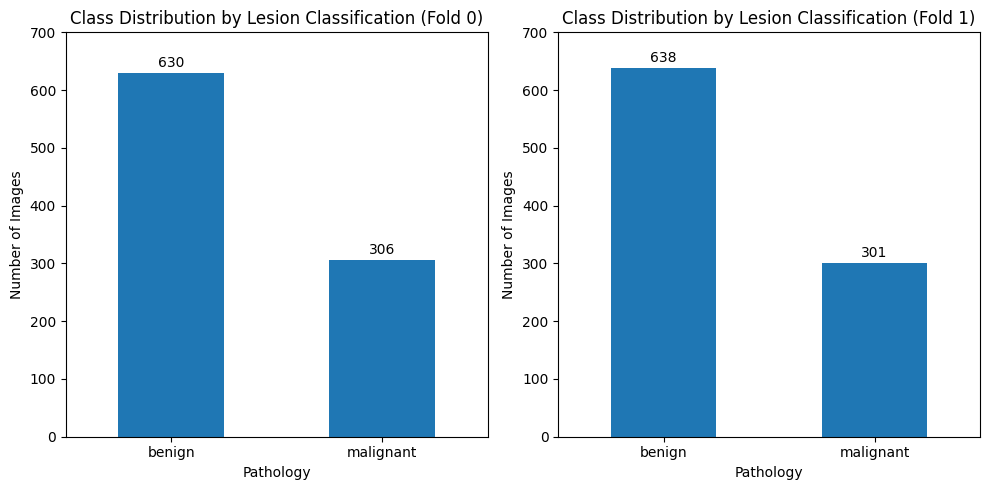

In [43]:
# Plot the distribution of lesion classifications in each split
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for i, ax in enumerate(axes.flat):
    value_counts = (
        busbra_dataset[busbra_dataset["Fold"] == i]["Pathology"]
        .value_counts()
        .sort_index()
    )
    value_counts.plot(kind="bar", ax=ax)

    for p in ax.patches:
        ax.text(p.get_x() + 0.25, p.get_height() + 10, str(p.get_height()), ha="center")

    ax.set_xticklabels(value_counts.index, rotation=0)
    ax.set_ylabel("Number of Images")
    ax.set_title(f"Class Distribution by Lesion Classification (Fold {i})")
    ax.set_ylim(0, 700)

plt.tight_layout()
plt.show()

#### BIRADS

In [44]:
# Split the patients into stratified splits
patients = (
    busbra_dataset.drop_duplicates("Case")
    .groupby(["BIRADS"], group_keys=False)
    .apply(lambda x: x.sample(frac=0.5, random_state=0))["Case"]
    .to_list()
)
indices = busbra_dataset[busbra_dataset["Case"].isin(patients)].index
busbra_dataset["Fold"] = 1
busbra_dataset.loc[indices, "Fold"] = 0
busbra_dataset.head(10)

/tmp/ipykernel_81434/3319466249.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  patients = busbra_dataset.drop_duplicates("Case").groupby(["BIRADS"], group_keys=False).apply(lambda x: x.sample(frac=0.5, random_state=0))["Case"].to_list()
/tmp/ipykernel_81434/3319466249.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  patients = busbra_dataset.drop_duplicates("Case").groupby(["BIRADS"], group_keys=False).apply(lambda x: x.sample(frac=0.5, random_state=0))["Case"].to_list()


,ID,Case,Histology,Pathology,BIRADS,Device,Width,Height,Side,BBOX,Patient,Fold
0,bus_0001-l,1,invasive ductal carcinoma,malignant,4,GE Logiq 7 @10-14MHz,274,353,left,"[91,24,103,79]",bus_0001,1
1,bus_0001-r,1,invasive ductal carcinoma,malignant,4,GE Logiq 7 @10-14MHz,275,353,right,"[102,24,82,79]",bus_0001,1
2,bus_0002-l,2,fibroadenoma,benign,4,GE Logiq 7 @10-14MHz,274,371,left,"[134,142,88,50]",bus_0002,0
3,bus_0002-r,2,fibroadenoma,benign,4,GE Logiq 7 @10-14MHz,276,371,right,"[113,143,68,47]",bus_0002,0
4,bus_0003-l,3,invasive ductal carcinoma,malignant,4,GE Logiq 7 @10-14MHz,275,372,left,"[71,78,126,137]",bus_0003,0
5,bus_0003-r,3,invasive ductal carcinoma,malignant,4,GE Logiq 7 @10-14MHz,274,372,right,"[80,66,179,156]",bus_0003,0
6,bus_0004-l,4,fibroadenoma,benign,4,GE Logiq 7 @10-14MHz,274,383,left,"[70,50,94,32]",bus_0004,1
7,bus_0004-r,4,fibroadenoma,benign,4,GE Logiq 7 @10-14MHz,277,383,right,"[112,53,87,47]",bus_0004,1
8,bus_0005-l,5,invasive ductal carcinoma,malignant,4,GE Logiq 7 @10-14MHz,275,371,left,"[118,50,82,141]",bus_0005,1
9,bus_0005-r,5,invasive ductal carcinoma,malignant,4,GE Logiq 7 @10-14MHz,276,371,right,"[108,45,138,153]",bus_0005,1


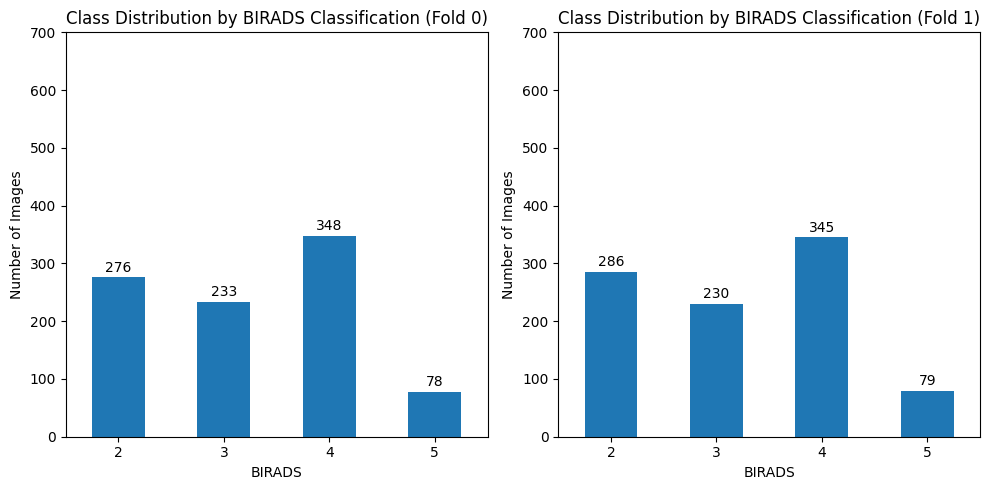

In [46]:
# Plot the distribution of lesion classifications in each split
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for i, ax in enumerate(axes.flat):
    value_counts = (
        busbra_dataset[busbra_dataset["Fold"] == i]["BIRADS"]
        .value_counts()
        .sort_index()
    )
    value_counts.plot(kind="bar", ax=ax)

    for p in ax.patches:
        ax.text(p.get_x() + 0.25, p.get_height() + 10, str(p.get_height()), ha="center")

    ax.set_xticklabels(value_counts.index, rotation=0)
    ax.set_ylabel("Number of Images")
    ax.set_title(f"Class Distribution by BIRADS Classification (Fold {i})")
    ax.set_ylim(0, 700)

plt.tight_layout()
plt.show()